In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
data = pd.concat([pd.read_csv('training_data.csv',names = ['x1', 'x2']),pd.read_csv('training_data_class_labels.csv', names = ['y'])], axis=1)
data.head()

,x1,x2,y
0,-0.235312,1.057181,0
1,0.812545,-0.551579,1
2,1.435676,-0.448038,1
3,1.612300,-0.311149,1
4,0.336496,0.087980,1


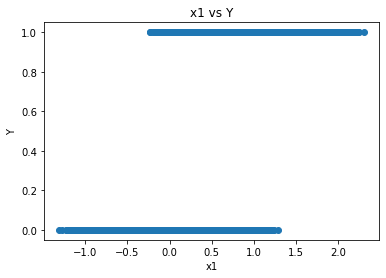

In [ ]:
plt.scatter(data["x1"],data["y"])
plt.xlabel('x1')
plt.ylabel('Y')
plt.title('x1 vs Y')
plt.show()

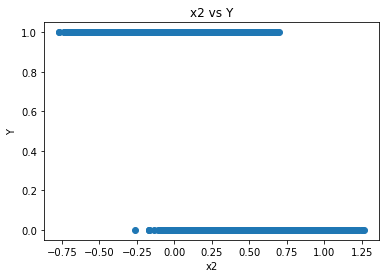

In [ ]:
plt.scatter(data["x2"],data['y'])
plt.xlabel('x2')
plt.ylabel('Y')
plt.title('x2 vs Y')
plt.show()

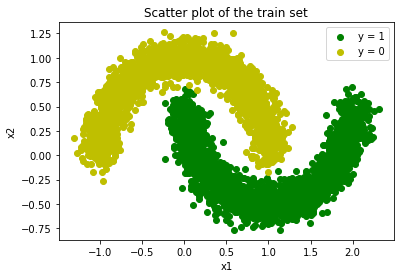

In [ ]:
fig = plt.figure()
ax = plt.axes()

dataone =data[data["y"]==1]
ax.scatter(dataone["x1"], dataone["x2"] ,label = 'y = 1', color = 'g')

datazero =data[data["y"]==0]
ax.scatter(datazero["x1"], datazero["x2"] ,label = 'y = 0', color = 'y')

ax.set_title('Scatter plot of the train set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

## Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data[["x1","x2"]],data["y"],test_size=0.2,random_state=50)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
y_pred = gnb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       458
           1       0.87      0.86      0.86       442

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



## Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       458
           1       0.87      0.86      0.87       442

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



## K-Nearest Neighbours Classifier

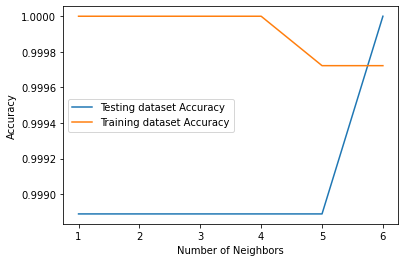

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### At k=6 the model has the best accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
final_knn = KNeighborsClassifier(n_neighbors=6)
final_knn.fit(X_train, y_train)

y_pred = final_knn.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       442

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### We will be using Knn as it gave us the highest macro averages f meassure

In [ ]:
X_test=pd.read_csv("test_data.csv",names=["x1","x2"])
X_test.head()

,x1,x2
0,0.245646,-0.267591
1,2.042604,0.380046
2,0.606186,0.645305
3,0.282751,0.957673
4,-0.429242,0.961515


In [ ]:
y_pred = final_knn.predict(X_test)

np.savetxt("sai_satyadarshan_bhuyan_testlabel.txt",y_pred,fmt="%s",delimiter=",")